# Lab 2: Convolutional Neural Network (CNN)

***Sina Hatami 5447389<br>
Shayan Alvansazyazdi 5447411***




In this laboratory we continue to work with Keras. We will focus on Convolutional Neural Network
we are going to work with cifar10, a  dataset consisting of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Therefore the main goal of this laboratory is to solve a multiclass classification problem with 10 different classes

<br><img src= "https://drive.google.com/uc?export=view&id=1u-htQUPUm40h4HBBvg-JA5r0IfrRHqrq" width="500px" align="middle"><br>)

### Loading the dataset 

In [1]:
import numpy as np
import tensorflow as tf 
import os
new_im_size = 32
channels = 3

(train_X,train_Y),(test_X,test_Y) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


# 2.1 Dataset pre-processing
The first thing that we need to do when we are dealing with a new dataset is to operate some pre-processing operations. Data preprocessing usually refers to the steps applied to make data more suitable for learning. 
In this section we are going to deal with:

* 2.1.1 Normalization
* 2.1.2 Standardization
* 2.1.3 Splitting and label preprocessing


## 2.1.1 Normalization
One common practice in training a Neural Network is to normalize the images by dividing each pixel value by the maximum value that we can have, i.e. 255.<br>
The purpose of this is to obtain a mean close to 0.<br>
Normalizing the data generally speeds up learning and leads to faster convergence

In [2]:
# Normalizing the data
print("Normalizing training set..")
train_X = np.asarray(train_X, dtype=np.float32) / 255 # Normalizing training set
print("Normalizing test set..")
test_X = np.asarray(test_X, dtype=np.float32) / 255 # Normalizing test set

Normalizing training set..
Normalizing test set..


## 2.1.3 Standardization
Another common practice in data pre-processing is standardization.<br>
The idea about standardization is to compute your dataset mean and standard deviation in order to subtract from every data point $x$ the dataset mean $\mu$ and then divide by the standard deviation $\sigma$.<br>
That is to apply the following operation:<br>
<img src="https://drive.google.com/uc?id=1rpuybw_fmI8XK38JQhWWxX2TOExBAV2V" width="150px"><br>
The outcome of this operation is to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.<br>
By applying normalization to our data we are making the features more similar to each other and this usually makes the learning process easier.<br>
To better understand that we can show an example of what happens after a standardization process is applied to a dataset:
<img src="https://drive.google.com/uc?id=1wtqTW4hz8n8k7b7q0mUSzCc9X0npNUY2" width="500px" align="left"><br>

In [3]:
# Standardizing the data
def standardize_dataset(X):
    image_means = []
    image_stds = []

    for image in X:
        image_means.append(np.mean(image)) # Computing the image mean
        image_stds.append(np.std(image)) # Computing the image standard deviation

    dataset_mean = np.mean(image_means) # Computing the dataset mean
    dataset_std = np.mean(image_stds) # Computing the dataset standard deviation
    return [dataset_mean, dataset_std] # For every image we subtract to it the dataset mean and we divide by the dataset standard deviation


In [4]:
dataset_mean, dataset_std = standardize_dataset(train_X)
print("Standardizing training set..")
train_X = (train_X-dataset_mean)/dataset_std # Standardizing the training set
print("Standardizing test set..")
test_X = (test_X-dataset_mean)/dataset_std # Standardizing the test set

Standardizing training set..
Standardizing test set..


## 2.1.4 Splitting and label preprocessing
Now we just need to split our training set in orer to get the validation set and convert our labels to one-hot representation

In [5]:
# Creating the validation set
from sklearn.model_selection import train_test_split
print("Splitting training set to create validation set..")
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

# Converting labels to one-hot representation
from tensorflow.keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y) # Converting training labels to one-hot representation
valid_Y_one_hot = to_categorical(valid_Y) # Converting validation labels to one-hot representation
test_Y_one_hot = to_categorical(test_Y) # Converting test labels to one-hot representation

print("Size of training")
print(len(train_X))
print(len(train_Y_one_hot))

print("Size of validation")
print(len(valid_X))
print(len(valid_Y_one_hot))

Splitting training set to create validation set..
Size of training
40000
40000
Size of validation
10000
10000


# 2.2 Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras. 
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:
<img src="https://drive.google.com/uc?id=1duP8u9bs6ELNu4degUuYP4-YS1mBYn2O" width="600px"><br>

Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them 
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

The convolutional part produces its output and the fully connected part ties together the received information in order to solve the classification problem.
Let us start with a shallow architecture with only 2 conv

In [6]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score

# Network parameters
batch_size = 32 # Setting the batch size
epochs = 10 # Setting the number of epochs
num_classes = 10 # Getting the amount of classes
print(num_classes)
scratch_model = Sequential()	

# Build here your keras model.
# Try to use one convolutional layer, joint with pooling layer and dropout layer
scratch_model.add(Conv2D(32, 3, 3, input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Dropout(0.2))

# Creating conv 1: conv with 32 kernels of size 3x3, padding='same', input_shape=(new_im_size, new_im_size, channels) 
# + LeakyReLU(alpha=0.1) + maxpooling with region size 2x2 and padding=''
scratch_model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1)  )
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

# Adding the dense final part: Flatten + Dense with 64 neurons and relu + Dropout 25% + Dense with 10 neurons and softmax
scratch_model.add(Flatten())
scratch_model.add(Dense(64, activation='relu'))
scratch_model.add(Dropout(0.25))
scratch_model.add(Dense(10, activation='softmax'))

# Compile the model with the Adam optimizer
scratch_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          9248      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 5, 5, 32)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                 

In [7]:
# Let's train the model!
scratch_model_history = scratch_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
1250/1250 [==============================] - 17s 5ms/step - loss: 1.7415 - accuracy: 0.3694 - val_loss: 1.4320 - val_accuracy: 0.4883
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4947 - accuracy: 0.4631 - val_loss: 1.3269 - val_accuracy: 0.5350
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4150 - accuracy: 0.4952 - val_loss: 1.2808 - val_accuracy: 0.5398
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3630 - accuracy: 0.5120 - val_loss: 1.2317 - val_accuracy: 0.5617
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3255 - accuracy: 0.5274 - val_loss: 1.1854 - val_accuracy: 0.5798
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2900 - accuracy: 0.5384 - val_loss: 1.1254 - val_accuracy: 0.6047
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2601 - accuracy: 0.5497 - val_loss: 1.1151 - val_accuracy

In [8]:
# Getting the results
scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(test_X), axis=-1), test_Y))

313/313 [==============================] - 1s 2ms/step
Test accuracy:  0.6086


**Is the obtained value coherent with what you expected?**<br>

***Comment: The Test accuracy is not suitable. Wee have to try a deeper network.***


### Try to make the network deeper, adding more Conv and Pooling layers. Do the performances improve? 

***Comment: After deeping, Conv and Pooling, the accuracy increased 0.12.***

In [9]:
# Network parameters
batch_size = 32													# Setting the batch size
epochs = 10														# Setting the number of epochs
num_classes = 10									# Getting the amount of classes
print(num_classes)
deeper_model = Sequential()	

# Build here your keras model.
# Try to use one or more convolutional layer, joint with pooling layer and dropout layer

# Creating conv 1
deeper_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(new_im_size, new_im_size, channels)))
deeper_model.add(LeakyReLU(alpha=0.1))
deeper_model.add(MaxPooling2D((2, 2),padding='same'))
deeper_model.add(Dropout(0.25))

# Creating conv 2
deeper_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
deeper_model.add(LeakyReLU(alpha=0.1))
deeper_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
deeper_model.add(Dropout(0.25))

# Adding the dense final part
deeper_model.add(Flatten())
deeper_model.add(Dense(64, activation='linear'))
deeper_model.add(LeakyReLU(alpha=0.1))
deeper_model.add(Dropout(0.25))
deeper_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer
deeper_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
deeper_model.summary()

10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                   

In [10]:
deeper_model_history = deeper_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 1.4492 - accuracy: 0.4801 - val_loss: 1.1050 - val_accuracy: 0.6132
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0975 - accuracy: 0.6111 - val_loss: 0.9331 - val_accuracy: 0.6712
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9806 - accuracy: 0.6547 - val_loss: 0.8899 - val_accuracy: 0.6834
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9072 - accuracy: 0.6801 - val_loss: 0.8556 - val_accuracy: 0.7008
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8565 - accuracy: 0.6992 - val_loss: 0.8578 - val_accuracy: 0.6994
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8094 - accuracy: 0.7131 - val_loss: 0.8369 - val_accuracy: 0.7110
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7835 - accuracy: 0.7216 - val_loss: 0.8009 - val_accuracy

In [11]:
# Getting the results
deeper_model_train_acc = deeper_model_history.history['accuracy']
deeper_model_valid_acc = deeper_model_history.history['val_accuracy']
deeper_model_train_loss = deeper_model_history.history['loss']
deeper_model_valid_loss = deeper_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(np.argmax(deeper_model.predict(test_X), axis=-1), test_Y))

313/313 [==============================] - 1s 2ms/step
Test accuracy:  0.7282


# 2.3 Using a pre-trained model
A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolutional part with a highly optimized convolutional part engineered and trained previously by someone else.<br>
Usually the models that we can use through keras.applications have been trained over the image net dataset. <br>
Today we are going to use the Xception Net model. Its architecture it is shown below:
<img src="https://drive.google.com/uc?id=1eKivBCSKnWKyBxmGe5s64oOyhzhuCaqU" width="600px"><br>
After the convolutional part replacement we still need to set up a fully connected part.<br>
**Why in this lab we cannot use the fully connected part of Xception Net?<br>
What should we do to use it?<br>


***Xception often designed for the specific task the model, If we are using the pre-trained model for a different task or a different dataset, it's often necessary to replace the fully connected layers with new layers that are designed for the new task and dataset. the features learned by the earlier layers may not be well-suited to the new task***

In [50]:
# Creating the model based over the pretrained Xception network
from tensorflow.keras import applications
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()

model.add(tensorflow.keras.layers.UpSampling2D(size=(7,7),input_shape=(32,32,3)))

Xception_model = applications.Xception(weights = "imagenet", include_top=False, input_shape = (224, 224, channels))

for layer in Xception_model.layers:
    layer.trainable = False
    
Inputs = layers.Input(shape=(32,32,3))
x = model(Inputs)
x = Xception_model(x)
x = layers.Flatten()(x)
# let's add a fully-connected layer
x = layers.Dense(128, activation='relu')(x)
# and a logistic layer for 10 classes
predictions = layers.Dense(10, activation='softmax')(x)

# this is the model we will train
pre_trained_model = tensorflow.keras.Model(Inputs, outputs=predictions)
pre_trained_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [51]:
# Visualize the model through the summary function
pre_trained_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_10 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               12845184  
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 33,707,954
Trainable params: 12,846,474
Non-t

In [52]:
# Let's train the model!
pretrained_model_history = pre_trained_model.fit(train_X, train_Y_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
1250/1250 [==============================] - 204s 161ms/step - loss: 0.9460 - accuracy: 0.7127 - val_loss: 0.6930 - val_accuracy: 0.7633
Epoch 2/10
1250/1250 [==============================] - 200s 160ms/step - loss: 0.5573 - accuracy: 0.8103 - val_loss: 0.6754 - val_accuracy: 0.7748
Epoch 3/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.4449 - accuracy: 0.8462 - val_loss: 0.6868 - val_accuracy: 0.7844
Epoch 4/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.3575 - accuracy: 0.8778 - val_loss: 0.6924 - val_accuracy: 0.7948
Epoch 5/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.2932 - accuracy: 0.8979 - val_loss: 0.8346 - val_accuracy: 0.7679
Epoch 6/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.2428 - accuracy: 0.9157 - val_loss: 0.9143 - val_accuracy: 0.7772
Epoch 7/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.2015 - accuracy: 0.9298 - val_

In [54]:
# Getting the results
pretrained_model_train_acc = pretrained_model_history.history['accuracy']
pretrained_model_valid_acc = pretrained_model_history.history['val_accuracy']
pretrained_model_train_loss = pretrained_model_history.history['loss']
pretrained_model_valid_loss = pretrained_model_history.history['val_loss']

test_X_feature = pre_trained_model.predict(test_X)						# Producing the test feature
print("Test accuracy: ", accuracy_score(np.argmax(pre_trained_model.predict(test_X), axis=-1), test_Y))

313/313 [==============================] - 39s 125ms/step
Test accuracy:  0.7812


# 2.4 Comparing the models

Now that we trained both the "from scratch" and the "pre-trained" models, we are going to compare the obtained results obtained during the training. We are going to consider accuracy and loss.<br>
**What can you expect from these plots?**

***Comment: Deeper model has better accuracy(lower loss) than scratch and Pre-train model has better accuracy(lower loss) than deeper model.***

Producing accuracy over epochs plot
Producing loss over epochs plot


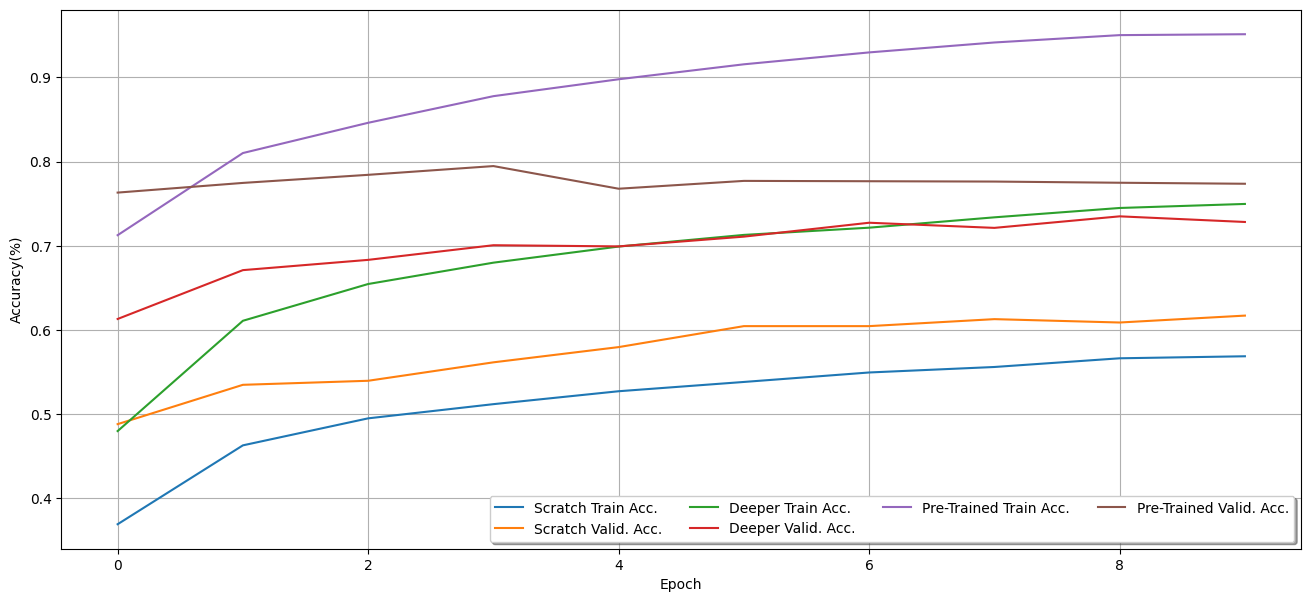

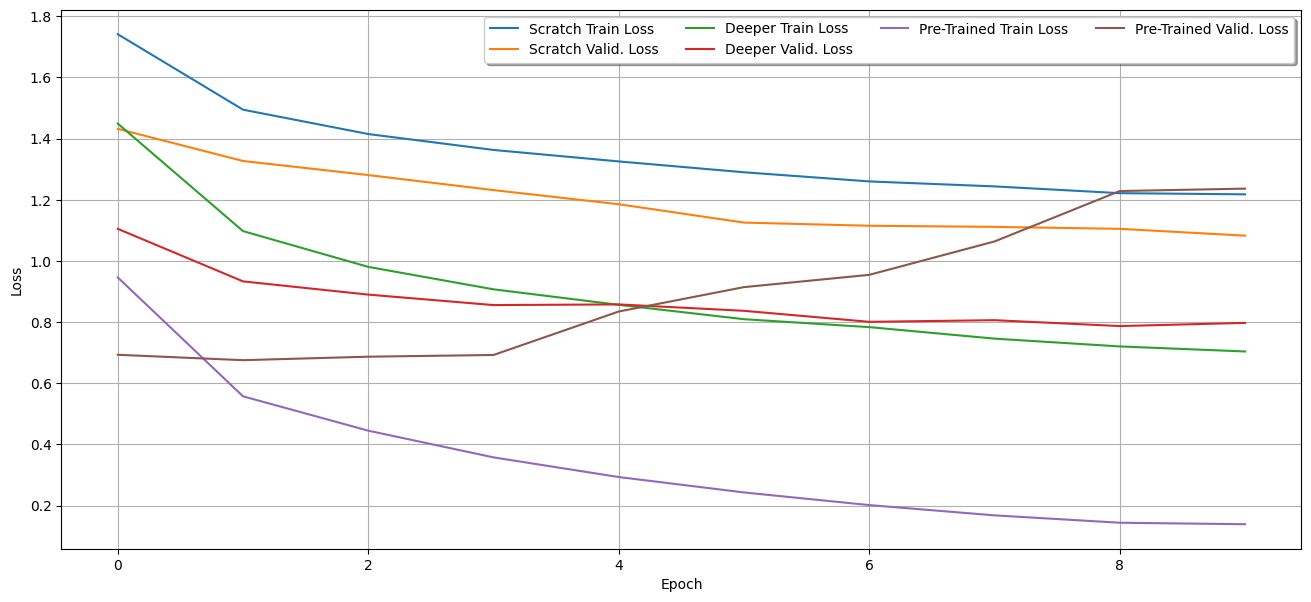

In [55]:
# Create here the plots to compare the "from scratch" model and the "pretrained" model
# Try to produce a comparison plot about the accuracies (train and validation) and another plot for the losses
# Creating the plots to compare the "from scratch" model and the "pretrained" model
# Producing accuracy over epochs plot
print("Producing accuracy over epochs plot")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_acc, label="Scratch Train Acc.") 
plt.plot(scratch_model_valid_acc, label="Scratch Valid. Acc.") 

plt.plot(deeper_model_train_acc, label="Deeper Train Acc.") 
plt.plot(deeper_model_valid_acc, label="Deeper Valid. Acc.") 

plt.plot(pretrained_model_train_acc, label="Pre-Trained Train Acc.") 
plt.plot(pretrained_model_valid_acc, label="Pre-Trained Valid. Acc.") 

plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('acc_epochs.png', dpi=300)


# Producing loss over epochs plot
print("Producing loss over epochs plot")
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_loss, label="Scratch Train Loss")
plt.plot(scratch_model_valid_loss, label="Scratch Valid. Loss")

plt.plot(deeper_model_train_loss, label="Deeper Train Loss")
plt.plot(deeper_model_valid_loss, label="Deeper Valid. Loss")

plt.plot(pretrained_model_train_loss, label="Pre-Trained Train Loss") 
plt.plot(pretrained_model_valid_loss, label="Pre-Trained Valid. Loss") 

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('loss_epochs.png', dpi=300)

plt.show()

**What information can you get from these plots?**<br>
**Try to visualize the differences between the deeper model and the pre-trained xception model!
**Are they showing what you expected?**

***Comment: Yes except Pre-Trained Valid. Loss. Pre-Trained Valid. Loss increased strangely.
The reason is that we  have overfitting. because using Xception Net mode will cause model may memorize the training data too well and fail to generalize to new data, resulting in a high test loss. This is because the model becomes too specialized to the training data and cannot effectively capture the underlying patterns in new data.***